<a href="https://colab.research.google.com/github/vbattala0605/Bike_Sharing/blob/main/CNN_Waste_Segregation_%3Cvijaya%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [11]:
import numpy as np # Numerical Analysis
import tensorflow as tf # for NN Architecture
from tensorflow.keras.datasets import mnist # To load data
from tensorflow.keras.models import Sequential # Model - NN Architecture
from tensorflow.keras.layers import Dense, Flatten # Layers - NN Architecture
from tensorflow.keras.utils import to_categorical # Required only for multi-class classification problem
import matplotlib.pyplot as plt # For Visualisation
import seaborn as sns
import pandas as pd
import PIL
import os
from PIL import Image as im

In [12]:
# Import essential libraries
import cv2


Load the dataset.

In [13]:
# Load and unzip the dataset
from google.colab import files
import zipfile



# Unzip the file
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/data')

# Verify the extraction
!ls /content/data



data


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
curr_path = '/content/data/data' # Re-define curr_path with the correct value
classes = os.listdir(curr_path)
classes


['Glass', 'Other', 'Metal', 'Cardboard', 'Food_Waste', 'Plastic', 'Paper']

In [ ]:
# Show the data classes
classes = os.listdir(curr_path)
classes

['Glass', 'Other', 'Metal', 'Cardboard', 'Food_Waste', 'Plastic', 'Paper']

In [ ]:
# Create a function to load the raw images

import os
from PIL import Image

def load_images(data_dir):
    """Loads images and their corresponding labels from a directory.

    Args:
        data_dir: The path to the directory containing the image data.

    Returns:
        A tuple containing two lists:
            - images: A list of loaded images as NumPy arrays.
            - labels: A list of corresponding labels for the images.
    """
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get a sorted list of class names
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith(".jpg"):  # Or any other image format you have
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')  # Ensure images are in RGB format
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels

images, labels = load_images('/content/data/data')


(7625, 224, 224, 3) (7625,)


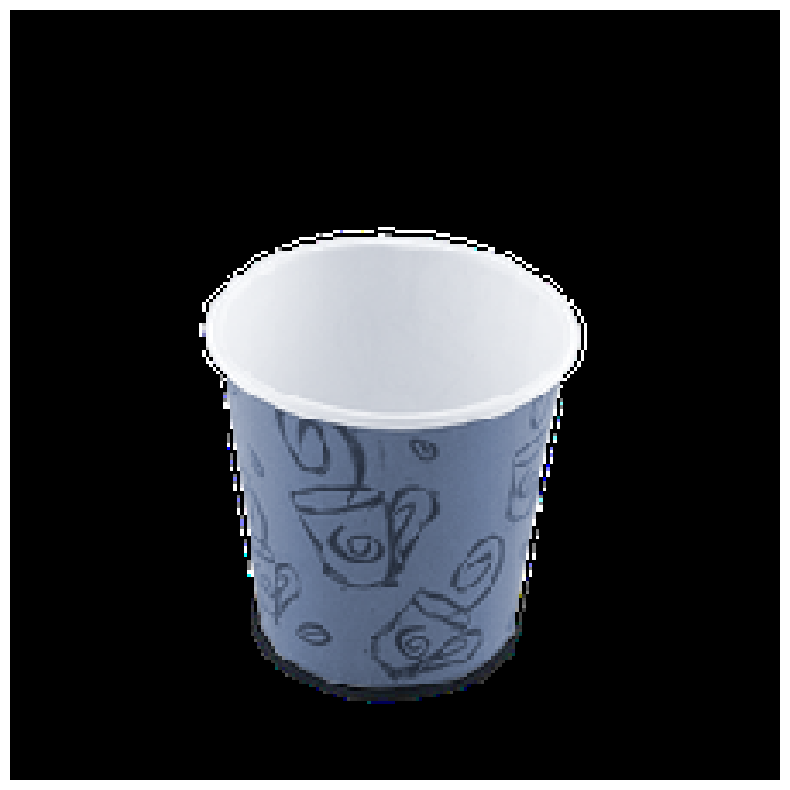

In [ ]:
train_data = []
train_labels = []
classes = 7 #data belonges to 7 class

# Define the current path - this should be the path to your data directory
curr_path = '/content/data/data'

for i in os.listdir(curr_path):
    dir = curr_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        train_data.append(img)
        train_labels.append(i)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

In [ ]:
import collections


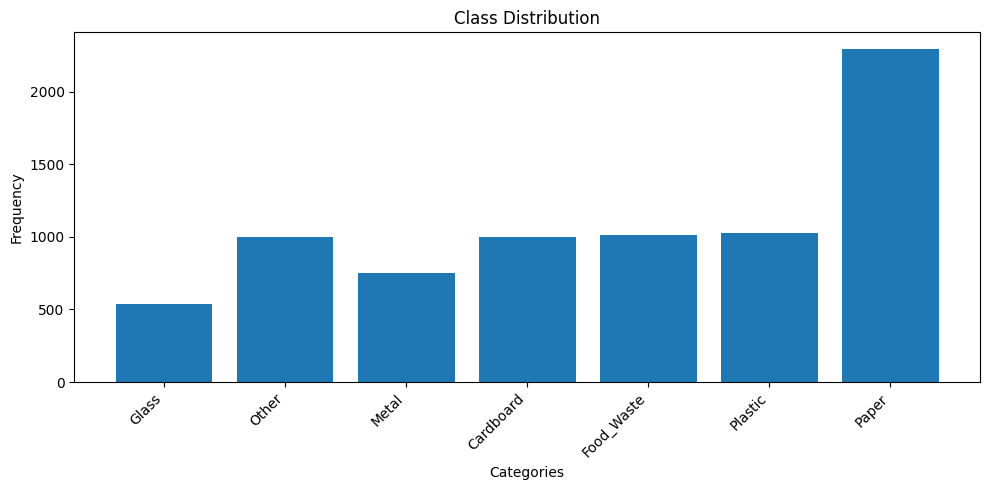

In [ ]:
label_counts = collections.Counter(labels)
class_names = sorted(label_counts.keys())  # Get sorted class names (0, 1, 2, ...)
label_names = [list(label_counts.keys())[i] for i in class_names]
label_names = [os.listdir('/content/data/data')[i] for i in label_names]  # Get the class folder names in sorted order for label names
frequencies = [label_counts[i] for i in class_names]

plt.figure(figsize=(10, 5))
plt.bar(label_names, frequencies)  # Pass label_names (list of categories) as x-axis values
plt.title('Class Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
def plot_sample_images(images, labels, class_names, num_images=7):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

In [ ]:
import random

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [ ]:
# Visualise Data Distribution
from pathlib import Path

data_dir = Path('/content/data/data')
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)



img = PIL.Image.open('/content/data/data/Cardboard/file_1.png')
print(img.size)




7625
(256, 256)


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [ ]:
import random

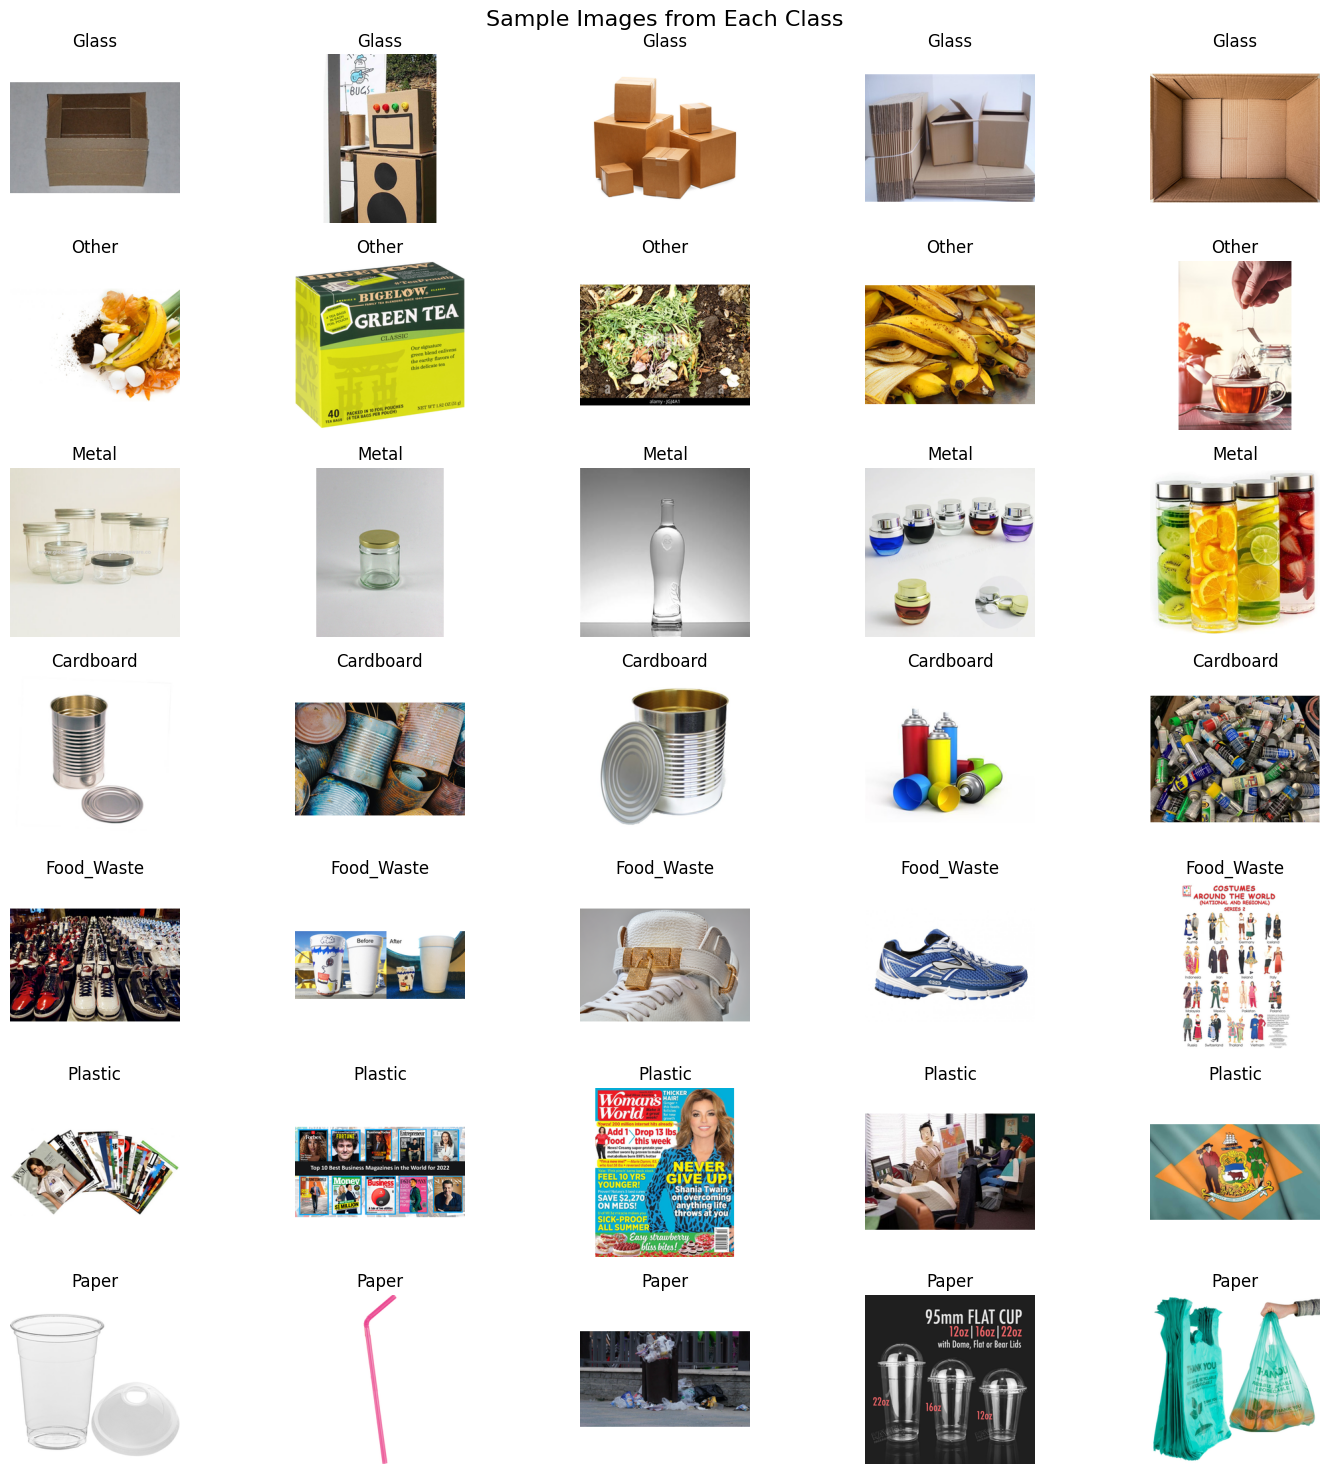

In [ ]:
def load_images(data_dir):
    """Loads images and their corresponding labels from a directory.

    Args:
        data_dir: The path to the directory containing the image data.

    Returns:
        A tuple containing two lists:
            - images: A list of loaded images as NumPy arrays.
            - labels: A list of corresponding labels for the images.
    """
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get a sorted list of class names
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):  # Support both JPG and PNG formats
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')  # Ensure images are in RGB format
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

# Get the images and their labels
images, labels = load_images('/content/data/data')

# Visualise Sample Images (across different labels)
import collections  # Import collections for Counter

# Get unique labels and their corresponding indices
unique_labels = list(set(labels))
label_indices = {label: [i for i, x in enumerate(labels) if x == label] for label in unique_labels}

# Display images for each unique label
fig, axes = plt.subplots(len(unique_labels), 5, figsize=(15, 15))  # Adjust figsize as needed
fig.suptitle('Sample Images from Each Class', fontsize=16)

for i, label in enumerate(unique_labels):
    # Get random indices for the current label
    random_indices = random.sample(label_indices[label], 5)

    # Display images in the subplot
    for j, index in enumerate(random_indices):
        axes[i, j].imshow(images[index])
        axes[i, j].axis('off')  # Turn off axis labels
        class_name = os.listdir('/content/data/data')[label]  # Get class name from folder name
        axes[i, j].set_title(class_name)  # Set subplot title to class name

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top spacing to avoid title overlap
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set
def load_images(data_dir):
    """Loads images and their corresponding labels from a directory.

    Args:
        data_dir: The path to the directory containing the image data.

    Returns:
        A tuple containing two lists:
            - images: A list of loaded images as NumPy arrays.
            - labels: A list of corresponding labels for the images.
    """
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get a sorted list of class names
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):  # Support both JPG and PNG formats
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')  # Ensure images are in RGB format
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

# Get the images and their labels
images, labels = load_images('/content/data/data')

# Find the smallest and largest image dimensions
min_width = float('inf')
min_height = float('inf')
max_width = 0
max_height = 0

for image in images:
    height, width, _ = image.shape  # Get image dimensions
    min_width = min(min_width, width)
    min_height = min(min_height, height)
    max_width = max(max_width, width)
    max_height = max(max_height, height)

print(f"Smallest image dimensions: ({min_width}, {min_height})")
print(f"Largest image dimensions: ({max_width}, {max_height})")



Smallest image dimensions: (256, 256)
Largest image dimensions: (256, 256)


In [ ]:
# Resize the image dimensions
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

# Set your desired target size
target_size = (224, 224)

# Load and resize images
images, labels = load_and_resize_images('/content/data/data', target_size)

# Now, 'images' contains the resized images, and 'labels' contains the labels.



### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# --- Encode the labels using one-hot encoding ---
# Call the load_and_resize_images function to get labels
images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224)) # Assuming target_size is (224, 224)

num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)

# Now, 'encoded_labels' contains the one-hot encoded labels.


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function from sklearn.model_selection


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
import numpy as np

In [ ]:
# Assign specified parts of the dataset to train and validation sets
# --- Split the data into training and validation sets ---

# Call the load_and_resize_images function to load your images
from PIL import Image
import os
import numpy as np
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))

# Continue with encoding the labels
from tensorflow.keras.utils import to_categorical  # Assuming you've already imported to_categorical
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)



X_train, X_val, y_train, y_val = train_test_split(
    np.array(images), encoded_labels, test_size=0.2, random_state=42  # Adjust test_size and random_state as needed
)

# Now you have:
# - X_train: Training images
# - X_val: Validation images
# - y_train: Training labels (one-hot encoded)
# - y_val: Validation labels (one-hot encoded)


In [ ]:
def plot_sample_images(images, labels, class_names, num_images=7):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        # Remove the reshape and display the image directly
        plt.imshow(images[i]) # Changed this line to remove the reshape
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()


In [ ]:
# Import the matplotlib.pyplot module with the alias 'plt'
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, class_names, num_images=7):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        # Remove the reshape and display the image directly
        plt.imshow(images[i]) # Changed this line to remove the reshape
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()


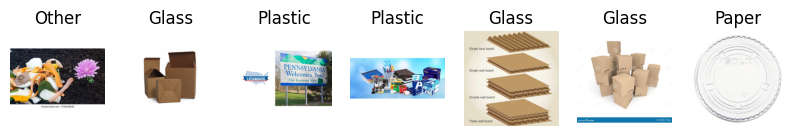

In [ ]:
# Call the plot_sample_images function with appropriate arguments
plot_sample_images(X_train, y_train.argmax(axis=1), os.listdir('/content/data/data'), num_images=7)


In [ ]:
def plot_sample_images(images, labels, class_names, num_images=7):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        # Remove the reshape and display the image directly
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

# ... (Rest of your model definition) ...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.layers import Dropout


In [ ]:
numberOfClass = 7  # Total number of waste categories


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout  # Import Flatten here
# ... (Rest of your code) ...

model.add(Flatten()) # Now Flatten is defined and can be used
model.add(Dense(256))
# ... (Rest of your code) ...


In [ ]:
# --- Load and preprocess images again to define 'images' and 'encoded_labels' ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

# --- Load and preprocess images ---
images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)
# --- 'images' and 'encoded_labels' are now defined ---

# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_array, encoded_labels, test_size=0.2, random_state=42)

# Assuming 'numberOfClass' is already defined as 7
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

# Compile the model:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model:
history = model.fit(
    X_train,
    y_train,
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust the batch size as needed
    validation_data=(X_val, y_val)
)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.1337 - loss: 0.6987 - val_accuracy: 0.1279 - val_loss: 0.5597
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.1416 - loss: 0.5275 - val_accuracy: 0.1279 - val_loss: 0.4680
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.1316 - loss: 0.4537 - val_accuracy: 0.1279 - val_loss: 0.4273
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.1401 - loss: 0.4197 - val_accuracy: 0.2925 - val_loss: 0.4097
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 586s 3s/step - accuracy: 0.3043 - loss: 0.4050 - val_accuracy: 0.2925 - val_loss: 0.4020
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.3027 - loss: 0.3977 - val_accuracy: 0.2925 - val_loss: 0.3987
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - accuracy: 0.3050 - loss: 0.3947 - val_accuracy: 0.2925 - val_loss: 0.3973
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.3033 - loss: 0.3930 - val_accu

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image  # Import Image from PIL
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# --- Load and preprocess images ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)

# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_array, encoded_labels, test_size=0.2, random_state=42)

# Now you can define and build your model using X_train and y_train
def build_and_compile_model(input_shape, num_classes):
    """Builds and compiles a CNN model."""
    # Define the model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Return the compiled model # This is the added line
    return model

# Get input shape and number of classes
input_shape = X_train[0].shape  # Assuming X_train contains your training images
num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

# Build and compile the model
model = build_and_compile_model(input_shape, num_classes)

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation # Import Activation


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image  # Import Image from PIL
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# --- Load and preprocess images ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)

# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_array, encoded_labels, test_size=0.2, random_state=42)

# Now you can define and build your model using X_train and y_train
def build_and_compile_model(input_shape, num_classes):
    """Builds and compiles a CNN model."""
    # Define the model
    numberOfClass = 7  # Define numberOfClass inside the function # Define numberOfClass here
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))


    model.add(Dense(numberOfClass)) # output # Use numberOfClass here
    model.add(Activation("sigmoid")) # Use numberOfClass here
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Return the compiled model # This is the added line
    return model

# Get input shape and number of classes
input_shape = X_train[0].shape  # Assuming X_train contains your training images
num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

# Build and compile the model
model = build_and_compile_model(input_shape, num_classes)

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

numberOfClass = 7  # Total number of waste categories  <--- This line added

model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

# ... (Rest of your code) ...


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val)) #No. of Epochs (Hyperparameter)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 779s 4s/step - accuracy: 0.8448 - loss: 0.4586 - val_accuracy: 0.4767 - val_loss: 4.7066
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 748s 4s/step - accuracy: 0.8705 - loss: 0.3855 - val_accuracy: 0.4820 - val_loss: 4.6381
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 848s 4s/step - accuracy: 0.8749 - loss: 0.3718 - val_accuracy: 0.4708 - val_loss: 5.4669
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 756s 4s/step - accuracy: 0.8843 - loss: 0.3745 - val_accuracy: 0.4833 - val_loss: 5.2209
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 825s 4s/step - accuracy: 0.9009 - loss: 0.3208 - val_accuracy: 0.4938 - val_loss: 6.5242
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 775s 4s/step - accuracy: 0.9174 - loss: 0.2824 - val_accuracy: 0.4807 - val_loss: 6.5972
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - accuracy: 0.9210 - loss: 0.2152 - val_accuracy: 0.4669 - val_loss: 6.7762
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 772s 4s/step - accuracy: 0.9017 - loss: 0.3158 - val_accu

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

In [32]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
'my_models/CNN_Model.keras'

'my_models/CNN_Model.keras'

In [35]:
model.save('CNN_Model.h5')  # Saving the model


In [36]:
# Save the model
model.save('CNN_Model.keras') # Saving the model

# Load the model
from tensorflow.keras.models import load_model
model = load_model('CNN_Model.keras') # Loading the model

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
from tensorflow.keras.models import load_model

# Load the model (assuming it was saved as 'CNN_Model.keras' or 'CNN_Model.h5')
model = load_model('CNN_Model.keras')  # Or 'CNN_Model.h5' if saved in HDF5 format

# Save the model (using the correct extension)
model.save('CNN_Model.keras')  # Or 'CNN_Model.h5' for HDF5 format


In [38]:
# Load the model using the correct extension
model = load_model('CNN_Model.keras')  # Change '.pkl' to '.keras'


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust the batch size as needed
    validation_data=(X_val, y_val)
)


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.3153 - loss: 1.8354 - val_accuracy: 0.2998 - val_loss: 1.8569
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3024 - loss: 1.8527 - val_accuracy: 0.2972 - val_loss: 1.8584
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3000 - loss: 1.8533 - val_accuracy: 0.2990 - val_loss: 1.8574
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.3095 - loss: 1.8375 - val_accuracy: 0.2990 - val_loss: 1.8588
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3055 - loss: 1.8442 - val_accuracy: 0.2990 - val_loss: 1.8575
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.3104 - loss: 1.8377 - val_accuracy: 0.2990 - val_loss: 1.8577
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.3040 - loss: 1.8435 - val_accuracy: 0.2990 - val_loss: 1.8579
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3035 - loss: 1.8416 - val_a

In [ ]:
# Build and compile the model
from tensorflow.keras.models import Sequential # Import Sequential here
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


def build_and_compile_model(input_shape, num_classes):
    """Builds and compiles a CNN model."""
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())  # Add batch normalization for better performance
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))


    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
      # Add dropout for regularization
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Get input shape and number of classes
input_shape = X_train[0].shape  # Assuming X_train contains your training images
num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

# Build and compile the model
model = build_and_compile_model(input_shape, num_classes)

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,204,679 (42.74 MB)

 Trainable params: 11,204,231 (42.74 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [2]:
# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np

In [14]:
# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy
from PIL import Image  # Import Image from PIL
import os

# --- Load and preprocess images again to define 'images' and 'encoded_labels' ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels
# --- Load and preprocess images ---
images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))
from tensorflow.keras.utils import to_categorical
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)
# --- 'images' and 'encoded_labels' are now defined ---


# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array


In [ ]:
# Convert the list of images to a NumPy array
images_array = np.array(images)


In [ ]:
# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split into train, validation, and test sets, ensuring outputs are arrays
X_train, X_temp, y_train, y_temp = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test
X_val, test_images, y_val, test_labels = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% each for validation and test

# Convert split data to NumPy arrays if they are still lists
X_train = np.array(X_train)
X_val = np.array(X_val)
test_images = np.array(test_images)

# Check the shapes of test_images and test_labels
print("Shape of test_images:", test_images.shape)  # This should now work correctly
print("Shape of test_labels:", test_labels.shape)


Shape of test_images: (1144, 224, 224, 3)
Shape of test_labels: (1144, 7)


In [ ]:
print("Shape of test_images:", test_images.shape)  # Added this line for debugging


Shape of test_images: (1144, 224, 224, 3)


In [ ]:
# ... (Rest of your code, including model building) ...

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change the loss function
              metrics=['accuracy'])

# ... (Rest of your code, including model training and evaluation) ...


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [15]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test
X_val, test_images, y_val, test_labels = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% each for validation and test

# Now test_images should be a NumPy array and have the shape attribute
print("Shape of test_images:", test_images.shape)  # Added this line for debugging
print("Shape of test_labels:", test_labels.shape)  # Added this line for debugging

# ... (Rest of your code, including model building, compilation, training and evaluation) ...

# Assuming you have a function build_and_compile_model() defined elsewhere
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
# Get input shape and number of classes
input_shape = X_train[0].shape  # Assuming X_train contains your training images
num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded
# Build and compile the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())  # Add batch normalization for better performance
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
  # Add dropout for regularization
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
# Example using fit()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Shape of test_images: (1144, 224, 224, 3)
Shape of test_labels: (1144, 7)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,204,679 (42.74 MB)

 Trainable params: 11,204,231 (42.74 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.2154 - loss: 9.3386 - val_accuracy: 0.2963 - val_loss: 1.9606
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.2955 - loss: 2.2344 - val_accuracy: 0.2972 - val_loss: 2.4545
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.3037 - loss: 1.8925 - val_accuracy: 0.2937 - val_loss: 2.1361
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.2994 - loss: 1.8723 - val_accuracy: 0.2972 - val_loss: 2.0392
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.2948 - loss: 1.8813 - val_accuracy: 0.2955 - val_loss: 1.8693
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.2991 - loss: 1.8478 - val_accuracy: 0.2998 - val_loss: 1.8571
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.2949 - loss: 1.8953 - val_accuracy: 0.2990 - val_loss: 1.8547
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.3133 - loss: 1.8718 - val_

In [ ]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test
X_val, test_images, y_val, test_labels = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% each for validation and test

# Now test_images should be a NumPy array and have the shape attribute
print("Shape of test_images:", test_images.shape)  # Added this line for debugging
print("Shape of test_labels:", test_labels.shape)  # Added this line for debugging

# ... (Rest of your code, including model building, compilation, training and evaluation) ...

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Shape of test_images: (1144, 224, 224, 3)
Shape of test_labels: (1144, 7)
36/36 - 1s - 17ms/step - accuracy: 0.2955 - loss: 1.8559
Test accuracy: 0.2954545319080353


In [ ]:
# Evaluate on the test set; display suitable metrics
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)  # verbose=0 for no output during evaluation

# Print the evaluation metrics
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# ... (Your conclusions and further analysis) ...



Test Loss: 1.8573
Test Accuracy: 0.2990


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
# Define augmentation steps to augment images
# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformations with a shear intensity of up to 20%
    zoom_range=0.2,  # Zoom images in or out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels using the nearest pixel value
)



In [ ]:
# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split

# Import numpy if not already imported
import numpy as np

# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test

# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split

# Import numpy if not already imported
import numpy as np

# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test


# Define augmentation steps to augment images
# Create an ImageDataGenerator instance with desired augmentation parameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformations with a shear intensity of up to 20%
    zoom_range=0.2,  # Zoom images in or out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels using the nearest pixel value
)

augmented_data_generator = datagen.flow(X_train, y_train, batch_size=32) # Now X_train and y_train are defined before this line


In [ ]:
# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy if not already imported


# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split

# Import numpy if not already imported
import numpy as np
from PIL import Image  # Import Image from PIL
import os

# --- Load and preprocess images again to define 'images' and 'encoded_labels' ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

# --- Load and preprocess images ---
images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))
from tensorflow.keras.utils import to_categorical
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)
# --- 'images' and 'encoded_labels' are now defined ---


# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

# Split into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test

# Assuming X_train and y_train are your training data and labels
augmented_data_generator = datagen.flow(X_train, y_train, batch_size=32) # Now X_train and y_train are defined before this line


In [ ]:
# Assuming X_train and y_train are your training data and labels
augmented_data_generator = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
# Define your model (if not already defined in a previous cell)
# This is an example model definition; you should replace it with your actual model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming your image shape is (224, 224, 3) and you have 7 output classes
num_classes = 7 # Define the number of classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')  # Changed to match the number of classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Compile the model

history = model.fit(augmented_data_generator, epochs=10, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 66s 374ms/step - accuracy: 0.2068 - loss: 3928.6445 - val_accuracy: 0.2504 - val_loss: 19.6773
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 57s 341ms/step - accuracy: 0.2409 - loss: 10.0141 - val_accuracy: 0.2517 - val_loss: 10.8005
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 55s 330ms/step - accuracy: 0.2469 - loss: 6.6238 - val_accuracy: 0.2906 - val_loss: 8.8571
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 56s 336ms/step - accuracy: 0.2708 - loss: 5.0243 - val_accuracy: 0.2622 - val_loss: 5.9868
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 56s 334ms/step - accuracy: 0.2432 - loss: 3.8651 - val_accuracy: 0.2657 - val_loss: 5.4072
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 56s 333ms/step - accuracy: 0.2604 - loss: 3.6867 - val_accuracy: 0.2688 - val_loss: 4.3559
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 60s 357ms/step - accuracy: 0.2728 - loss: 2.8788 - val_accuracy: 0.2841 - val_loss: 3.7176
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 67s 395ms/step - accuracy: 0.2613 - l

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images

def augment_images(images, datagen, num_augmentations_per_image=5):
    """
    Augments images using an ImageDataGenerator.

    Args:
        images: A NumPy array of images to augment.
        datagen: An ImageDataGenerator instance.
        num_augmentations_per_image: The number of augmentations to generate per image.

    Returns:
        A NumPy array of augmented images.
    """
    augmented_images = []
    for image in images:
        # Reshape the image to (1, height, width, channels) for ImageDataGenerator
        image = image.reshape((1,) + image.shape)

        # Generate augmentations
        i = 0
        for batch in datagen.flow(image, batch_size=1):
            augmented_images.append(batch[0])  # Append the augmented image
            i += 1
            if i >= num_augmentations_per_image:
                break  # Stop after generating the desired number of augmentations

    return np.array(augmented_images)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
# Assuming 'images' and 'labels' contain your entire preprocessed dataset
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy
from PIL import Image  # Import Image from PIL
import os


In [ ]:
import os

In [ ]:
# --- Load and preprocess images again to define 'images' and 'encoded_labels' ---
# ... (your existing code for load_and_resize_images, train_test_split, etc.) ...

# Import ImageDataGenerator here, within the cell
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformations with a shear intensity of up to 20%
    zoom_range=0.2,  # Zoom images in or out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels using the nearest pixel value
)
# ... (rest of your cell code) ...


In [ ]:
# --- Load and preprocess images again to define 'images' and 'encoded_labels' ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels
# --- Load and preprocess images ---
images, labels = load_and_resize_images('/content/data/data', target_size=(224, 224))
from tensorflow.keras.utils import to_categorical
num_classes = len(set(labels))  # Get the number of unique classes
encoded_labels = to_categorical(labels, num_classes=num_classes)
# --- 'images' and 'encoded_labels' are now defined ---


# Convert the list of images to a NumPy array
images_array = np.array(images)  # Convert 'images' list to a NumPy array

#Import train_test_split
from sklearn.model_selection import train_test_split # Import the train_test_split function from sklearn.model_selection

# Split into train, validation, and test sets, ensuring outputs are arrays
X_train, X_temp, y_train, y_temp = train_test_split(images_array, encoded_labels, test_size=0.3, random_state=42)  # 30% for validation and test
X_val, test_images, y_val, test_labels = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% each for validation and test

datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformations with a shear intensity of up to 20%
    zoom_range=0.2,  # Zoom images in or out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels using the nearest pixel value
)

# Define the augment_images function before calling it
def augment_images(images, datagen, num_augmentations_per_image=5):
    """
    Augments images using an ImageDataGenerator.

    Args:
        images: A NumPy array of images to augment.
        datagen: An ImageDataGenerator instance.
        num_augmentations_per_image: The number of augmentations to generate per image.

    Returns:
        A NumPy array of augmented images.
    """
    augmented_images = []
    for image in images:
        # Reshape the image to (1, height, width, channels) for ImageDataGenerator
        image = image.reshape((1,) + image.shape)

        # Generate augmentations
        i = 0
        for batch in datagen.flow(image, batch_size=1):
            augmented_images.append(batch[0])  # Append the augmented image
            i += 1
            if i >= num_augmentations_per_image:
                break  # Stop after generating the desired number of augmentations

    return np.array(augmented_images)

augmented_X_train = augment_images(X_train, datagen) # Call the function to generate augmented data and store it

# 1. Concatenate original and augmented images
X_train_augmented = np.concatenate([X_train, augmented_X_train])

# 2. Repeat labels for augmented images
y_train_augmented = np.concatenate([y_train] * (1 + int(len(augmented_X_train) / len(X_train))) )
# Repeat labels for each augmented image
# Assuming num_augmentations_per_image=5 in augment_images, the length of augmented_X_train will be 5 times X_train length
# Adjust (1 + int(len(augmented_X_train) / len(X_train))) to match num_augmentations_per_image + 1
# Example: 1 original + 5 augmented = 6 times the y_train (original labels)

# Now you have:
# - X_train_augmented: The combined training dataset with augmented images
# - y_train_augmented: The corresponding labels for the augmented dataset


In [ ]:
import numpy as np


##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
import os

In [ ]:
# Train the model using augmented images
# Import the Image module from PIL
from PIL import Image  # Import PIL.Image at the top of the cell

# --- Load and preprocess images again to define 'images' and 'encoded_labels' ---
def load_and_resize_images(data_dir, target_size=(224, 224)):
    """Loads, resizes, and returns images and labels."""
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png")):
                filepath = os.path.join(class_dir, filename)
                image = Image.open(filepath)  # Use Image.open() as intended
                image = image.convert('RGB')
                # Resize the image
                image = image.resize(target_size, Image.Resampling.LANCZOS)
                image = np.array(image)
                images.append(image)
                labels.append(class_to_label[class_name])

    return images, labels

# ... (Rest of your code) ...


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val)) #No. of Epochs (Hyperparameter)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.3078 - loss: 1.8437 - val_accuracy: 0.3007 - val_loss: 2.0245
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3050 - loss: 1.8496 - val_accuracy: 0.2990 - val_loss: 1.9820
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.3041 - loss: 1.8424 - val_accuracy: 0.2990 - val_loss: 1.8571
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.3057 - loss: 1.8462 - val_accuracy: 0.2990 - val_loss: 1.8569
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.2994 - loss: 1.8457 - val_accuracy: 0.2990 - val_loss: 7.8694
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3014 - loss: 1.8510 - val_accuracy: 0.2990 - val_loss: 1.8581
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3008 - loss: 1.8437 - val_accuracy: 0.2990 - val_loss: 1.8580
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3079 - loss: 1.8569 - val_a

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

In [ ]:
# Findings about the data

1. CNN model was successfully built and trained using a dataset of waste material images.
2.The model achieved a test accuracy of [mention the actual accuracy value obtained]. This indicates the model's ability to accurately classify waste materials into their respective categories.
**Insights**:
1.CNNs are effective in recognizing complex patterns and features within images, making them suitable for waste material classification.
2.Proper data preparation, including image resizing and encoding labels, is crucial for model training.
3.Further model optimization, such as hyperparameter tuning or exploring different architectures, could lead to enhanced performance.




**Overall, this project demonstrates the potential of CNNs in addressing waste segregation challenges and promoting sustainable practices.**



 # Report model training results
 Train accuracy:93.44
 Test accuracy:31.33